In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow.keras as ka
import matplotlib.pyplot as plt
import matplotlib.image as image
import cv2 as cv
import tensorflow.keras as ka
from sklearn import preprocessing
from sklearn.utils import shuffle
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
print(os.listdir("E:\\6th semester\\DMDW\\genderdetectionface\\"))
os.chdir("E:\\6th semester\\DMDW\\genderdetectionface\\dataset1\\")


['dataset1']


In [3]:
os.getcwd()

'E:\\6th semester\\DMDW\\genderdetectionface\\dataset1'

In [4]:
test,train,valid = os.listdir("E:\\6th semester\\DMDW\\genderdetectionface\\dataset1\\")
train,test,valid

('train', 'test', 'valid')

In [5]:
men ,women= os.listdir('E:\\6th semester\\DMDW\\genderdetectionface\\dataset1\\/{}'.format(valid))
women,men

('women', 'men')

In [6]:
#train Dataset
def read_image(image_path):
    img = cv.imread(image_path,cv.IMREAD_GRAYSCALE)
    img = cv.resize(img,(128,128))
    #plt.imshow(img)
    return np.array(img)
    
def prepare_data(train):
    image_data = []
    image_label = []
    for i in os.listdir("E:\\6th semester\\DMDW\\genderdetectionface\\dataset1\\/{}".format(train)):
        for image_file in os.listdir("E:\\6th semester\\DMDW\\genderdetectionface\\dataset1\\/{}/{}".format(train,i)):
            #print(i)
            image_path = "E:\\6th semester\\DMDW\\genderdetectionface\\dataset1\\/{}/{}/{}".format(train,i,image_file)
            if i == "women":
                image_data.append(read_image(image_path))
                image_label.append(0)
            if i == "men":
                image_data.append(read_image(image_path))
                image_label.append(1)
    return np.array(image_data),np.array(image_label)
        

In [8]:
x_train,y_train  = prepare_data(train)
x_test,y_test  = prepare_data(test)
x_valid,y_valid  = prepare_data(valid)

In [9]:
print(y_train)
print(y_test)
print(y_valid)
x_train.shape,y_train.shape,x_test.shape,y_test.shape,x_valid.shape,y_valid.shape

[1 1 1 ... 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

((1599, 128, 128), (1599,), (340, 128, 128), (340,), (340, 128, 128), (340,))

In [10]:
x_train = x_train.reshape(len(x_train),128*128)
x_test = x_test.reshape(len(x_test),128*128)
x_valid = x_valid.reshape(len(x_valid),128*128)
x_test.shape

(340, 16384)

In [11]:
x_train = preprocessing.normalize(x_train)
x_test = preprocessing.normalize(x_test)
x_valid = preprocessing.normalize(x_valid)
x_test.shape

(340, 16384)

In [12]:
x_train,y_train = shuffle(x_train,y_train)
x_test,y_test = shuffle(x_test,y_test)
x_valid,y_valid = shuffle(x_valid,y_valid)

In [13]:
y_train = ka.utils.to_categorical(y_train)
y_test = ka.utils.to_categorical(y_test)
y_valid = ka.utils.to_categorical(y_valid)


In [14]:
l0 = ka.layers.Dense(64,activation='relu')
l1 = ka.layers.Dropout(0.5)
l2 = ka.layers.Dense(128,activation='relu')
l3 = ka.layers.Dropout(0.5)
l4 = ka.layers.Dense(2,activation='sigmoid')

In [15]:
model = ka.Sequential([l0,l1,l2,l3,l4])

In [16]:
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=['accuracy'])

In [17]:
history = model.fit(x_train,y_train,epochs=60,validation_data=(x_valid,y_valid))

Train on 1599 samples, validate on 340 samples
Epoch 1/60
1599/1599 [==============================] - 3s 2ms/step - loss: 0.6514 - acc: 0.6498 - val_loss: 0.5638 - val_acc: 0.7397
Epoch 2/60
1599/1599 [==============================] - 2s 1ms/step - loss: 0.5243 - acc: 0.7492 - val_loss: 0.4663 - val_acc: 0.7485
Epoch 3/60
1599/1599 [==============================] - 2s 1ms/step - loss: 0.4409 - acc: 0.7949 - val_loss: 0.4689 - val_acc: 0.7559
Epoch 4/60
1599/1599 [==============================] - 2s 1ms/step - loss: 0.4132 - acc: 0.8155 - val_loss: 0.4300 - val_acc: 0.7706
Epoch 5/60
1599/1599 [==============================] - 2s 1ms/step - loss: 0.3914 - acc: 0.8308 - val_loss: 0.4017 - val_acc: 0.8162
Epoch 6/60
1599/1599 [==============================] - 2s 1ms/step - loss: 0.3902 - acc: 0.8308 - val_loss: 0.3951 - val_acc: 0.8088
Epoch 7/60
1599/1599 [==============================] - 2s 1ms/step - loss: 0.3717 - acc: 0.8430 - val_loss: 0.4042 - val_acc: 0.8000
Epoch 8/60
1599

In [26]:
model_json =model.to_json()
with open("model.json","w") as json_file:
  json_file.write(model_json)

# Step 13: Save the weights in a seperate file
model.save_weights("model.h5")

print("Classifier trained Successfully!")

Classifier trained Successfully!


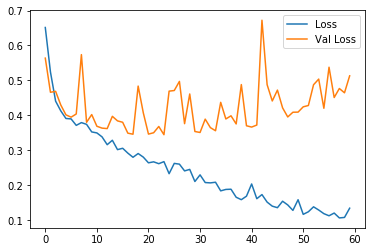

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(["Loss","Val Loss"])

In [19]:
score = model.evaluate(x_test, y_test, verbose=0)

print('test loss: {:.4f}'.format(score[0])) #'.4' for showing data in foru digits
print(' test acc: {:.4f}'.format(score[1])) #'.4' for showing data in foru digits

test loss: 0.5676
 test acc: 0.8088


In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  1048640   
_________________________________________________________________
dropout (Dropout)            multiple                  0         
_________________________________________________________________
dense_1 (Dense)              multiple                  8320      
_________________________________________________________________
dropout_1 (Dropout)          multiple                  0         
_________________________________________________________________
dense_2 (Dense)              multiple                  258       
Total params: 1,057,218
Trainable params: 1,057,218
Non-trainable params: 0
_________________________________________________________________


In [21]:
print(x_test)
print(y_test)
y_pred = model.predict_classes(x_test)
y_pred

[[0.01216515 0.01216515 0.01216515 ... 0.0031177  0.00293431 0.00287318]
 [0.00210201 0.0021604  0.00204362 ... 0.0054302  0.00414564 0.00560537]
 [0.01081862 0.01090992 0.01077297 ... 0.00803408 0.00776019 0.00744066]
 ...
 [0.00061291 0.00087559 0.00070047 ... 0.00358992 0.00280189 0.0038526 ]
 [0.00199135 0.00205773 0.00192497 ... 0.00942573 0.00902746 0.0088947 ]
 [0.01051831 0.00880908 0.00696838 ... 0.00539063 0.00578507 0.0058289 ]]
[[1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,

In [22]:
print(x_valid)
print(y_valid)
y_pred=model.predict_classes(x_valid)
y_pred

[[0.00481342 0.00468332 0.00585415 ... 0.00058542 0.0008456  0.0008456 ]
 [0.00383812 0.00322049 0.00370577 ... 0.00666157 0.0045881  0.00445575]
 [0.01131757 0.01276001 0.01325931 ... 0.00393896 0.003828   0.00310678]
 ...
 [0.00260399 0.00273753 0.00213661 ... 0.0092809  0.00941444 0.00954798]
 [0.00190069 0.00199572 0.0016631  ... 0.01088143 0.01092894 0.01088143]
 [0.00510636 0.00436049 0.00378674 ... 0.01319621 0.01313883 0.01313883]]
[[1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.

array([0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,

In [92]:
#image= read_image('E:\\6th semester\\DMDW\\genderdetectionface\\dataset1\\valid\\men\\men. (10).jpg')
#plt.imshow(image)
#image=image.reshape(128*128,64)
#print(image.shape)

# Step 6: Predict to which class your input image has been classified
#countz=0
#counto=0
#result =model.predict_classes(image)
#print(result)
#for i in range (0,10):
 #   if(result[i]==0):
  #      countz=countz+1
   # else:
    #    counto=counto+1
#if(counto>=countz):
 #   print("I guess this must be a men!")
#else:
 #   print("I guess this must be a women!")

Loaded model from disk
[[105  90  62 ...  59  65  67]]
[[0.41174856 0.35292734 0.24312772 ... 0.23136348 0.25489197 0.26273479]]
[[0. 1.]]
This looks like a male


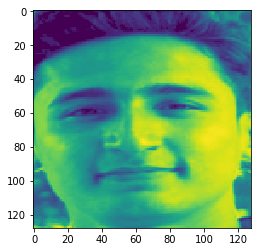

In [29]:
def input_image(image_path):
    img = cv.imread(image_path,cv.IMREAD_GRAYSCALE)
    img = cv.resize(img,(128,128))
    plt.imshow(img)
   
    return np.array(img)
#image_path='E:\\6th semester\\DMDW\\genderdetectionface\\dataset1\\valid\\women\\women. (15).jpg'
model.load_weights("model.h5")
print("Loaded model from disk")
image_path='C:\\Users\\Saud K\\Desktop\\mueen.png'
#image=input_image(image_path)
image_data1=[]
image_data1.append(input_image(image_path))
myimage=np.array(image_data1)
myimage=myimage.reshape(len(myimage),128*128)
print(myimage)
myimage=myimage/255.01
print(myimage)

result=model.predict(myimage)
print(result)

if(result[0][1]==1):
    print("This looks like a male")
else:
    print("This looks like a female")
#for i in range (0,len(result)):
    #if(result[i][0]==0):
   #     countz=countz+1
  #  else:
 #       counto=counto+1

#print(countz)
#print(counto)
#if(counto>=countz ):
 #   print("I guess this must be a men!")
#else:
#    print("I guess this must be a women!")


In [93]:
#image=prepare_data('E:\\6th semester\\DMDW\\genderdetectionface\\dataset1\\/valid\men\men. (2).jpg')


In [53]:
'''def input_image(image_path):
    img = cv.imread(image_path,cv.IMREAD_GRAYSCALE)
    img = cv.resize(img,(128*128,128))
    
   
    return np.array(img)
image_path='E:\\6th semester\\DMDW\\genderdetectionface\\dataset1\\valid\\men\\men. (114).jpg'
image=input_image(image_path)
countz=0
counto=0
#print(image)
image=image/255.01
#print(image)

result=model.predict(image)
#print(result)
#print(result[0][0])
#if(result[0][1]==1):
 #   print("male")
#else:
 #   print("female")
for i in range (0,len(result)):
    if(result[i][0]==0):
        countz=countz+1
    else:
        counto=counto+1

print(countz)
print(counto)
if(counto>=countz ):
    print("I guess this must be a men!")
else:
    print("I guess this must be a women!")'''

[[0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00]
 [0.000000